In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data loading
data=pd.read_csv('crime_data.csv')

In [5]:
data.isna().sum()

Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Desc     0
Weapon Desc     0
Status Desc     0
LOCATION        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230545 entries, 0 to 230544
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date Rptd     230545 non-null  object
 1   DATE OCC      230545 non-null  object
 2   TIME OCC      230545 non-null  object
 3   AREA          230545 non-null  int64 
 4   AREA NAME     230545 non-null  object
 5   Part 1-2      230545 non-null  int64 
 6   Crm Cd        230545 non-null  int64 
 7   Crm Cd Desc   230545 non-null  object
 8   Vict Age      230545 non-null  int64 
 9   Vict Sex      230545 non-null  object
 10  Vict Descent  230545 non-null  object
 11  Premis Desc   230545 non-null  object
 12  Weapon Desc   230545 non-null  object
 13  Status Desc   230545 non-null  object
 14  LOCATION      230545 non-null  object
dtypes: int64(4), object(11)
memory usage: 26.4+ MB


In [19]:
data.describe()

,AREA,Part 1-2,Crm Cd,Vict Age
count,230545.000000,230545.000000,230545.000000,230545.000000
mean,10.466881,1.544991,508.044629,34.451513
std,6.225582,0.497973,240.542475,18.003355
min,1.000000,1.000000,110.000000,-2.000000
25%,5.000000,1.000000,230.000000,23.000000
50%,11.000000,2.000000,624.000000,33.000000
75%,16.000000,2.000000,626.000000,46.000000
max,21.000000,2.000000,956.000000,99.000000


In [21]:
data.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Desc', 'Weapon Desc', 'Status Desc', 'LOCATION'],
      dtype='object')

In [23]:
data.duplicated().sum()

1211

In [27]:
data.drop_duplicates(inplace=True)

In [67]:
# Check the number of unique values in each column
data.nunique()

Date Rptd        1095
DATE OCC         1383
TIME OCC         1433
AREA               21
AREA NAME          21
Part 1-2            2
Crm Cd            116
Crm Cd Desc       116
Vict Age          101
Vict Sex            4
Vict Descent       19
Premis Desc       293
Weapon Desc        77
Status Desc         6
LOCATION        35528
dtype: int64

In [63]:
# Check unique values for a Vict Sex column
data['Vict Sex'].unique()

array(['F', 'M', 'X', 'H'], dtype=object)

In [43]:
data.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION
0,2022-04-12,2020-10-01,00:01,19,Mission,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,8,F,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,13400 RANGOON ST
1,2023-01-05,2020-02-01,08:00,2,Rampart,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,900 N MARIPOSA AV
2,2023-03-21,2020-03-15,12:00,19,Mission,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,12,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,8500 COLUMBUS AV
3,2023-06-04,2020-07-01,12:00,20,Olympic,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1700 S WESTMORELAND AV
4,2022-02-02,2020-02-09,12:00,11,Northeast,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,30,F,W,SINGLE FAMILY DWELLING,UNKNOWN WEAPON/OTHER WEAPON,Adult Other,2800 WAVERLY DR


In [69]:
# Frequency count of unique values in 'Vict Sex' column
data['Vict Sex'].value_counts()

Vict Sex
M    111540
F    105368
X     13618
H        19
Name: count, dtype: int64

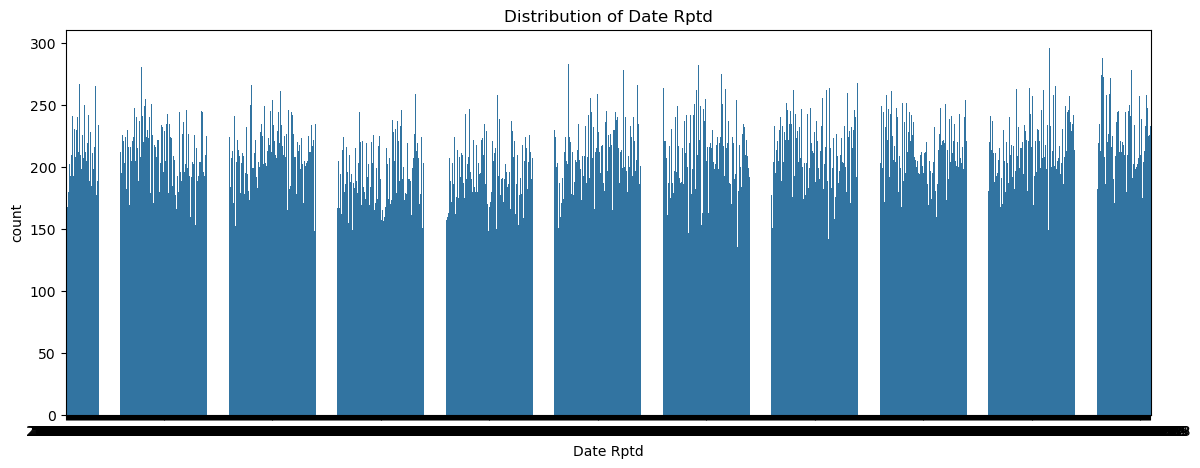

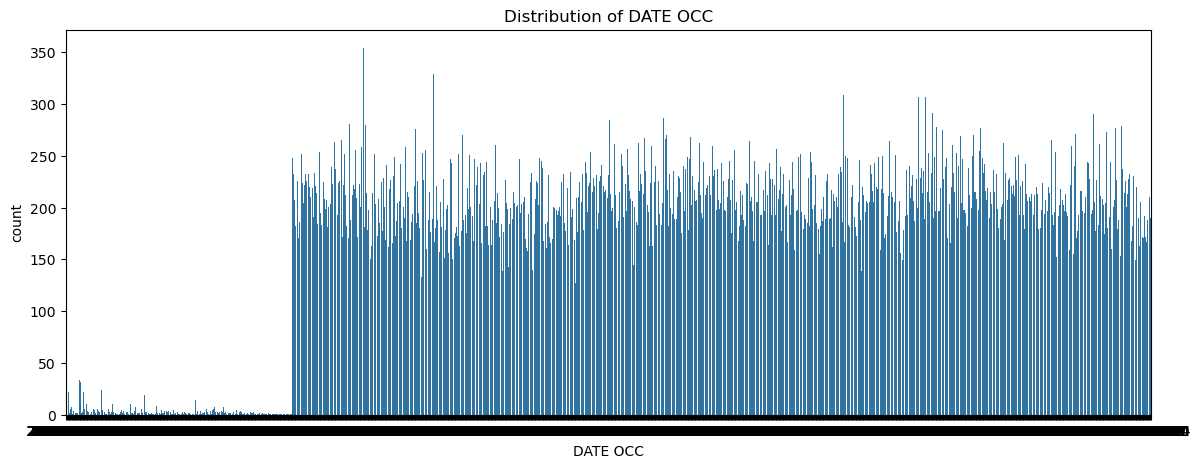

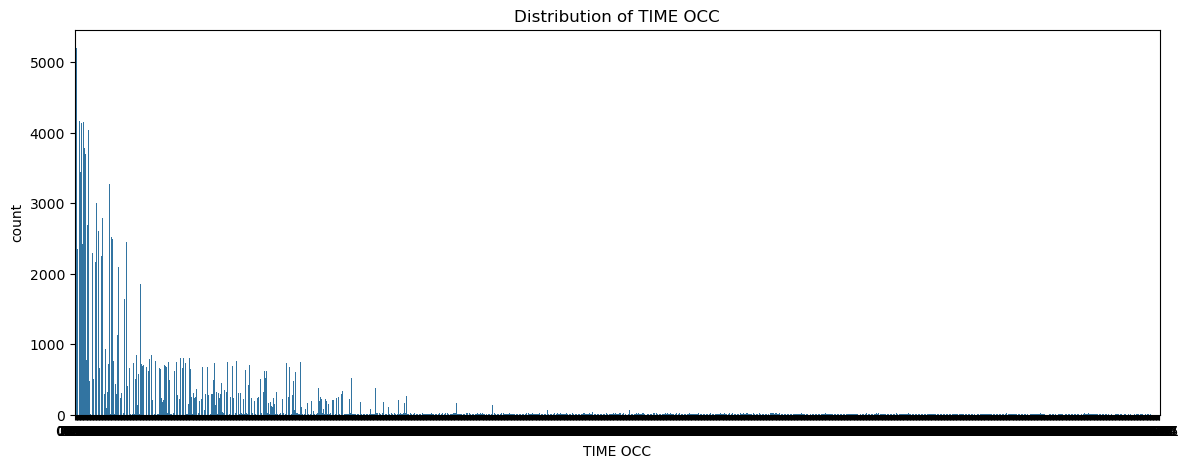

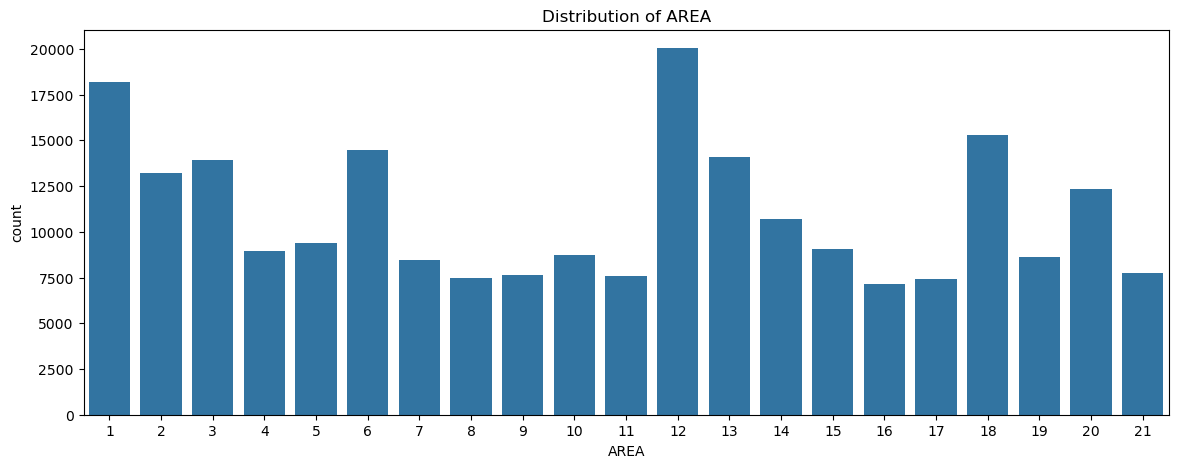

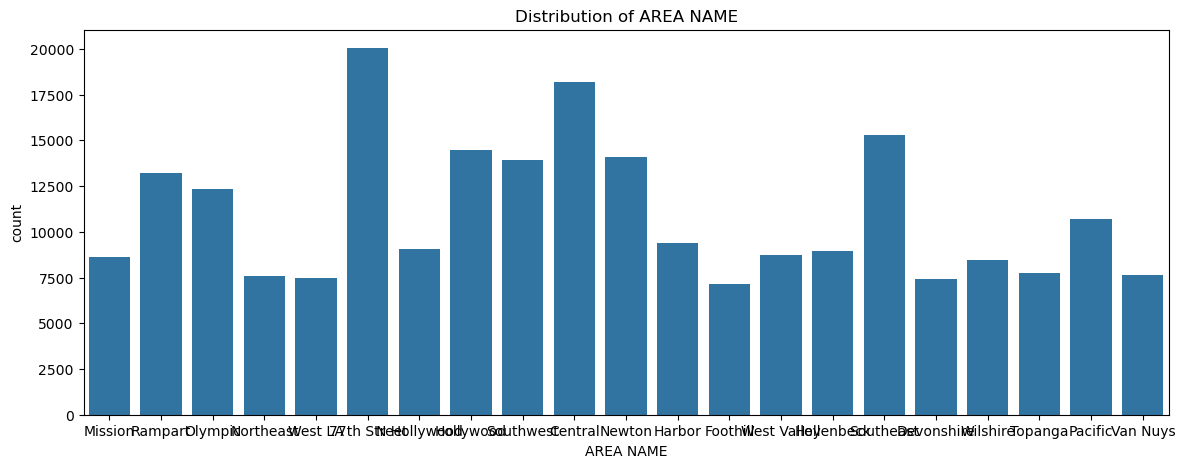

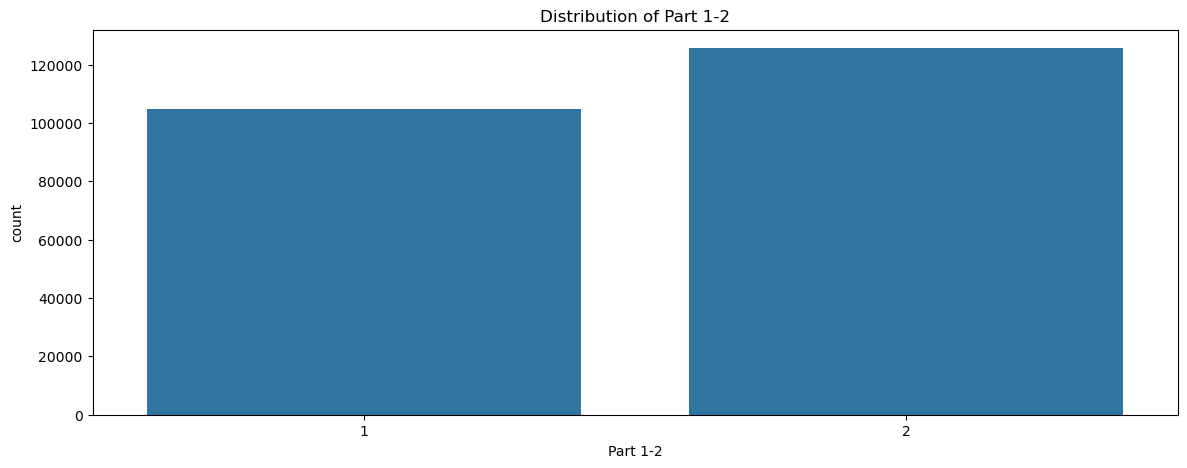

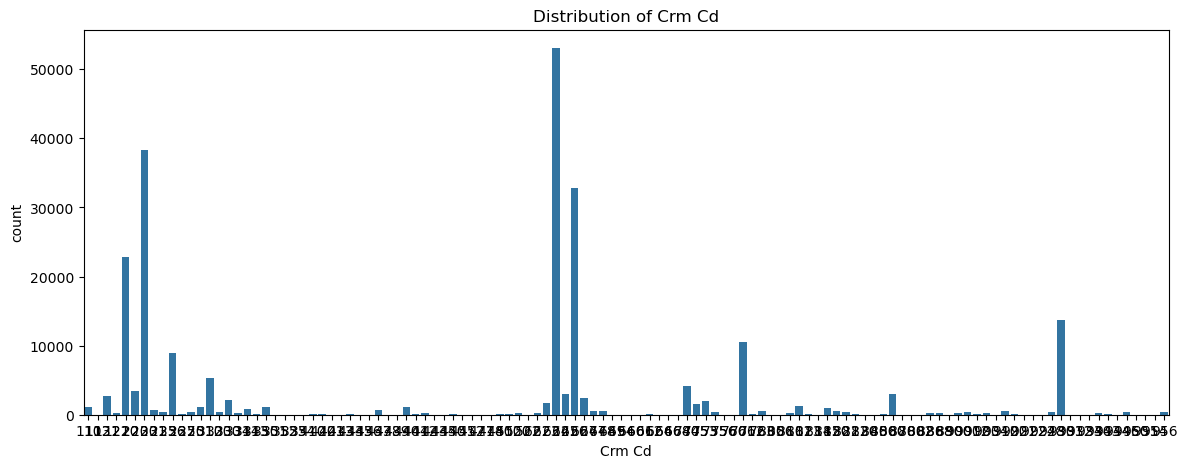

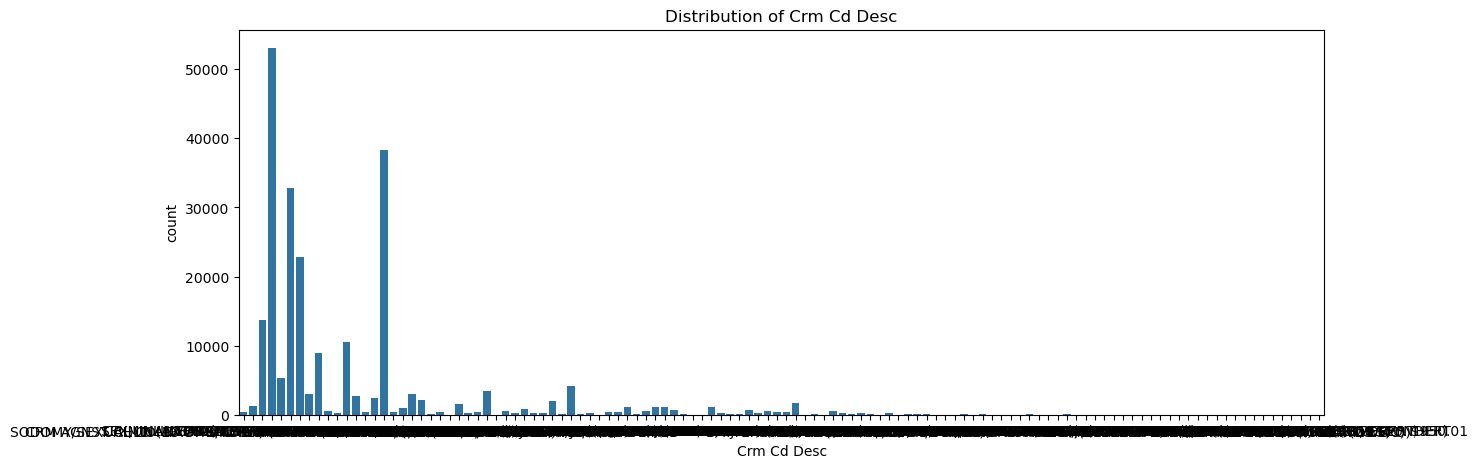

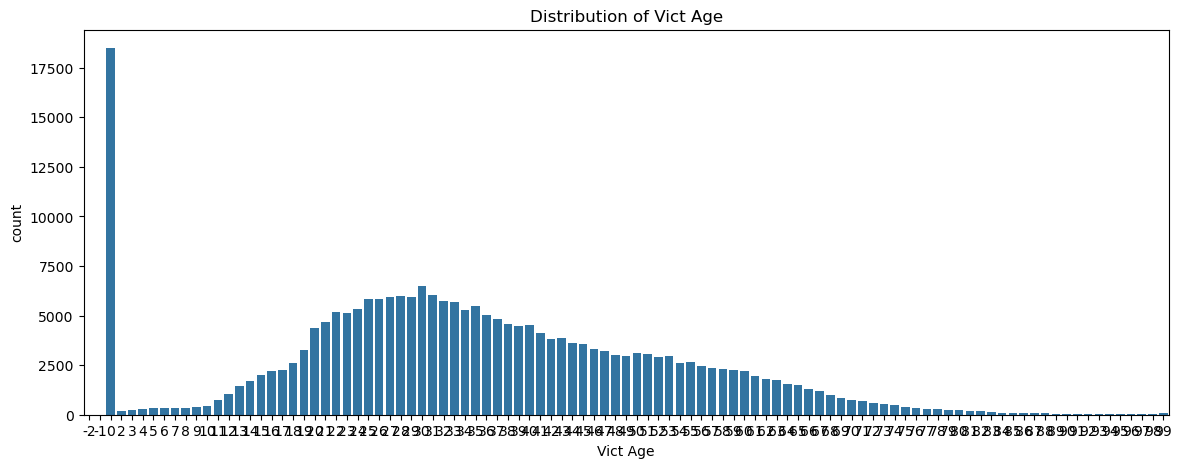

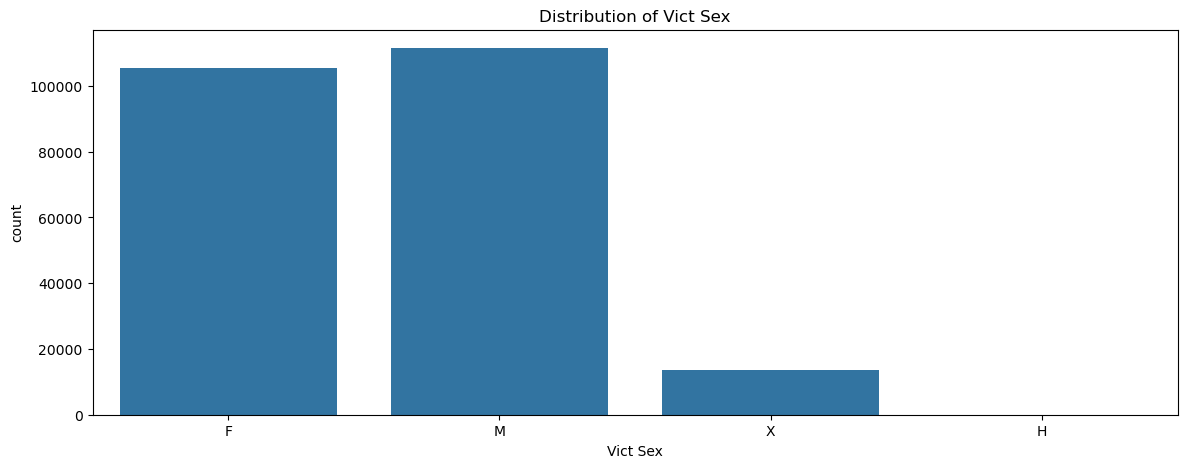

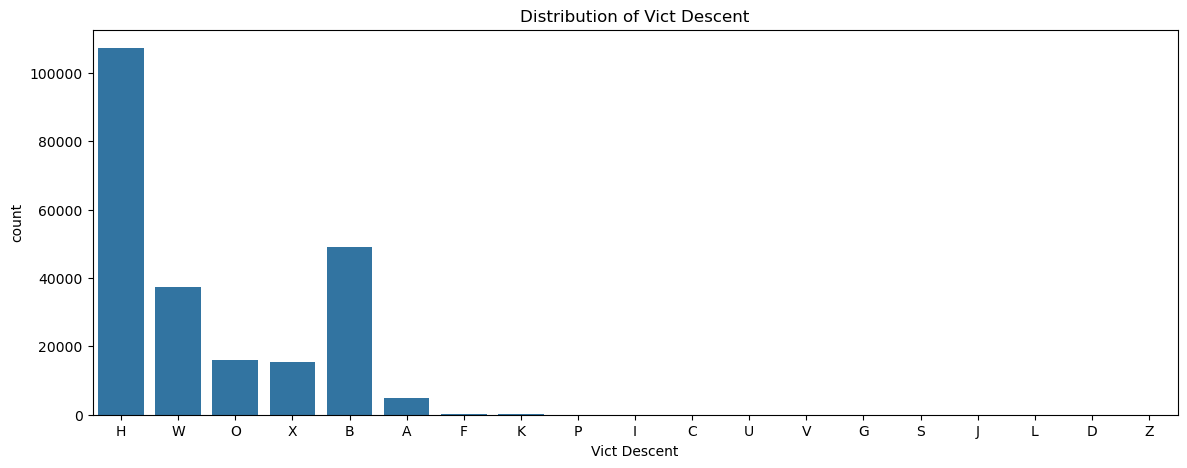

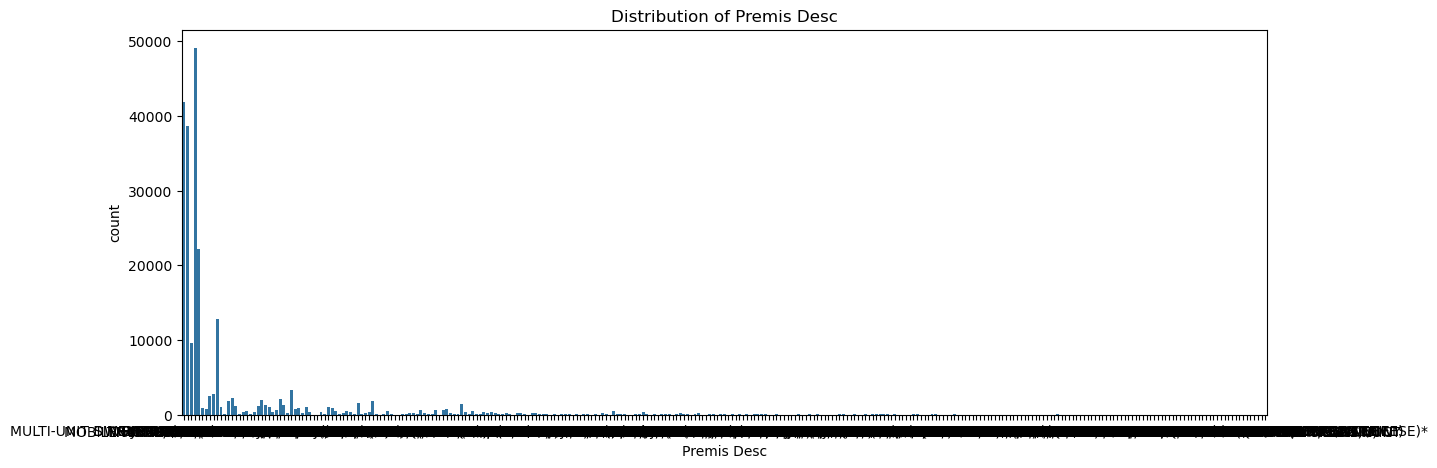

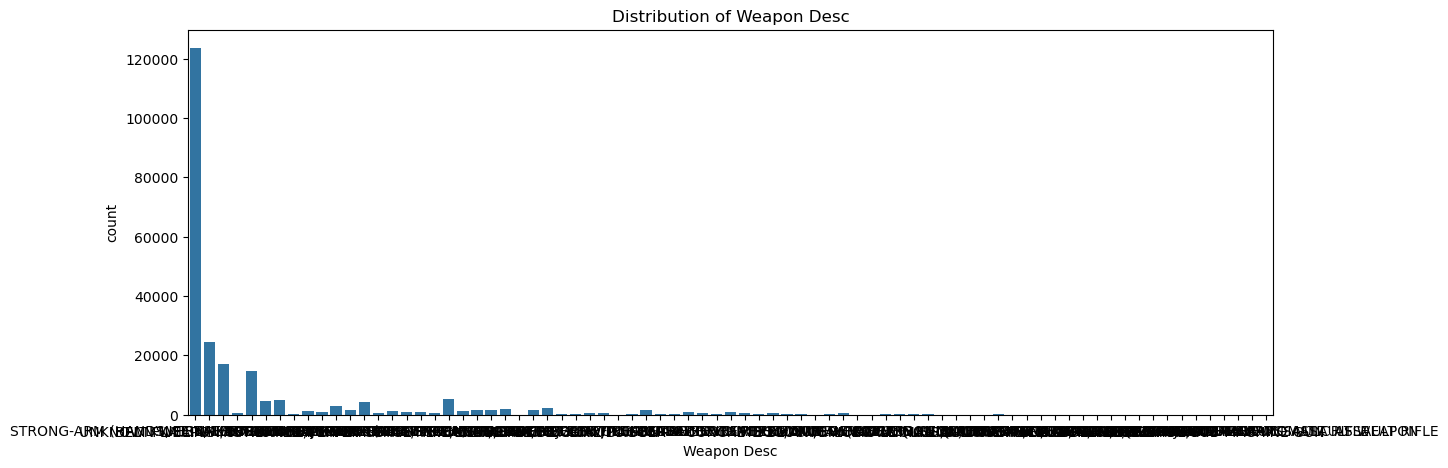

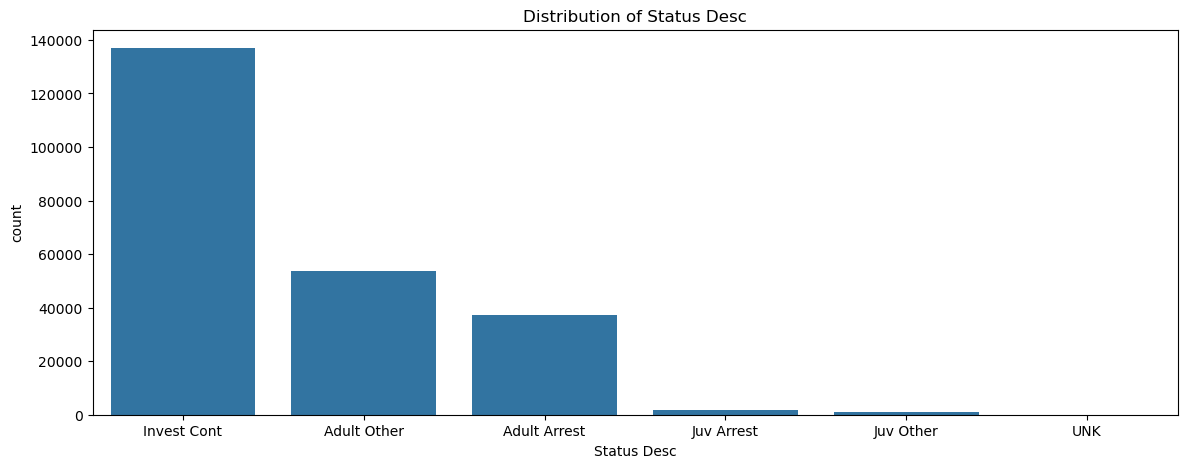

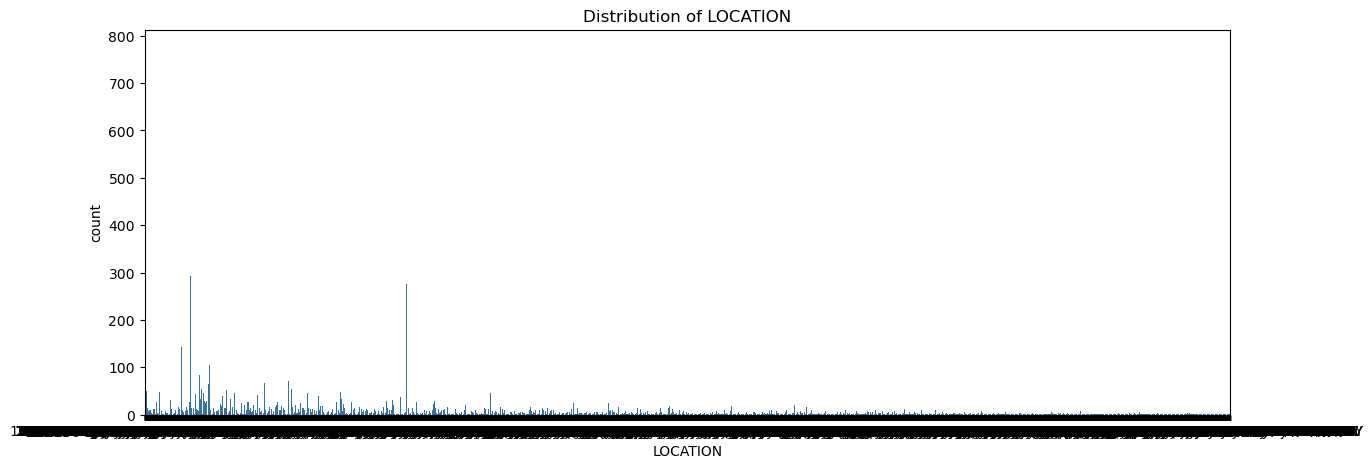

In [101]:
#count of every column in dataset
for column in data:
    plt.figure(figsize=(14, 5)) 
    sns.countplot(x=column,data=data)
    plt.title(f'Distribution of {column}')
    plt.show()

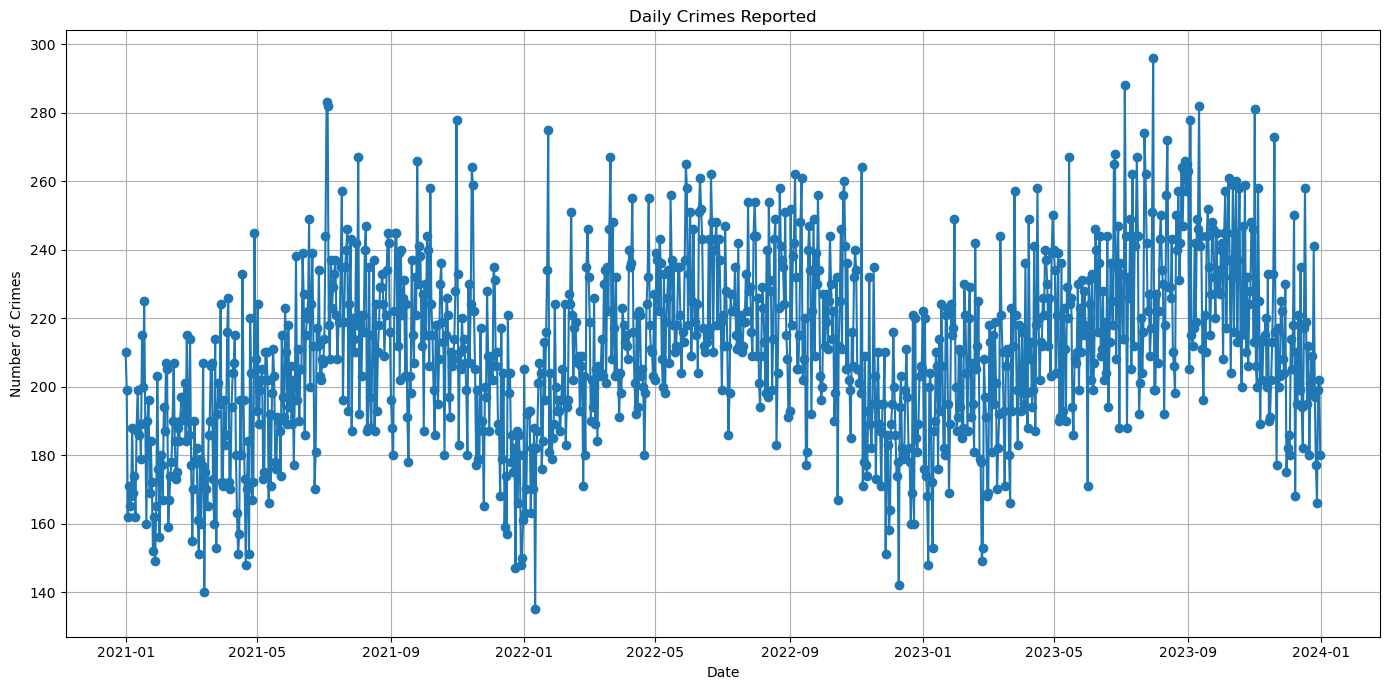

In [13]:
#plot for crimes reported
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])

# Aggregate crime counts by day
daily_crimes = data.resample('D', on='Date Rptd').size()

# Plot the time series of reported crimes
plt.figure(figsize=(14, 7))
plt.plot(daily_crimes.index, daily_crimes.values, marker='o')
plt.title('Daily Crimes Reported')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()


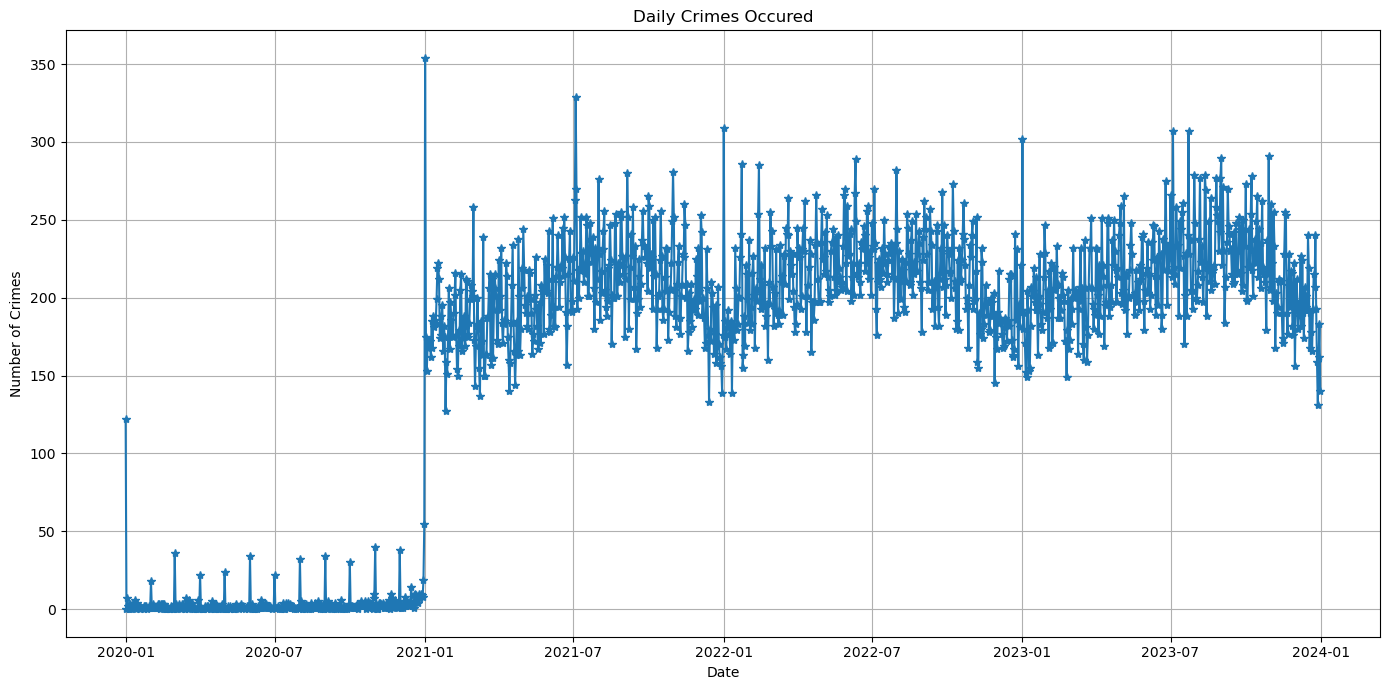

In [91]:
#plot for crimes occured
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Aggregate crime counts by day
daily_crimes = data.resample('D', on='DATE OCC').size()

# Plot the time series of reported crimes
plt.figure(figsize=(14, 7))
plt.plot(daily_crimes.index, daily_crimes.values,marker='*')
plt.title('Daily Crimes Occured')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
data['Weapon Desc'].unique()

array(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT',
       'BELT FLAILING INSTRUMENT/CHAIN', 'HAND GUN', 'UNKNOWN FIREARM',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'FIXED OBJECT',
       'KITCHEN KNIFE', 'MACHETE', 'MACE/PEPPER SPRAY', 'STICK',
       'OTHER KNIFE', 'PHYSICAL PRESENCE',
       'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'HAMMER',
       'BLUNT INSTRUMENT', 'OTHER CUTTING INSTRUMENT',
       'SEMI-AUTOMATIC PISTOL', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN',
       'PIPE/METAL PIPE', 'CLUB/BAT', 'ROCK/THROWN OBJECT', 'ICE PICK',
       'BOTTLE', 'VEHICLE', 'CAUSTIC CHEMICAL/POISON', 'BOARD',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'OTHER FIREARM', 'DIRK/DAGGER',
       'SWITCH BLADE', 'FOLDING KNIFE', 'GLASS', 'AXE', 'SIMULATED GUN',
       'SCISSORS', 'RAZOR BLADE', 'REVOLVER', 'FIRE', 'RIFLE',
       'CONCRETE BLOCK/BRICK', 'SHOTGUN', 'STUN GUN', 'EXPLOXIVE DEVICE',
       'BOMB THREAT', 'SCREWDRIVER', 'DOG/ANI

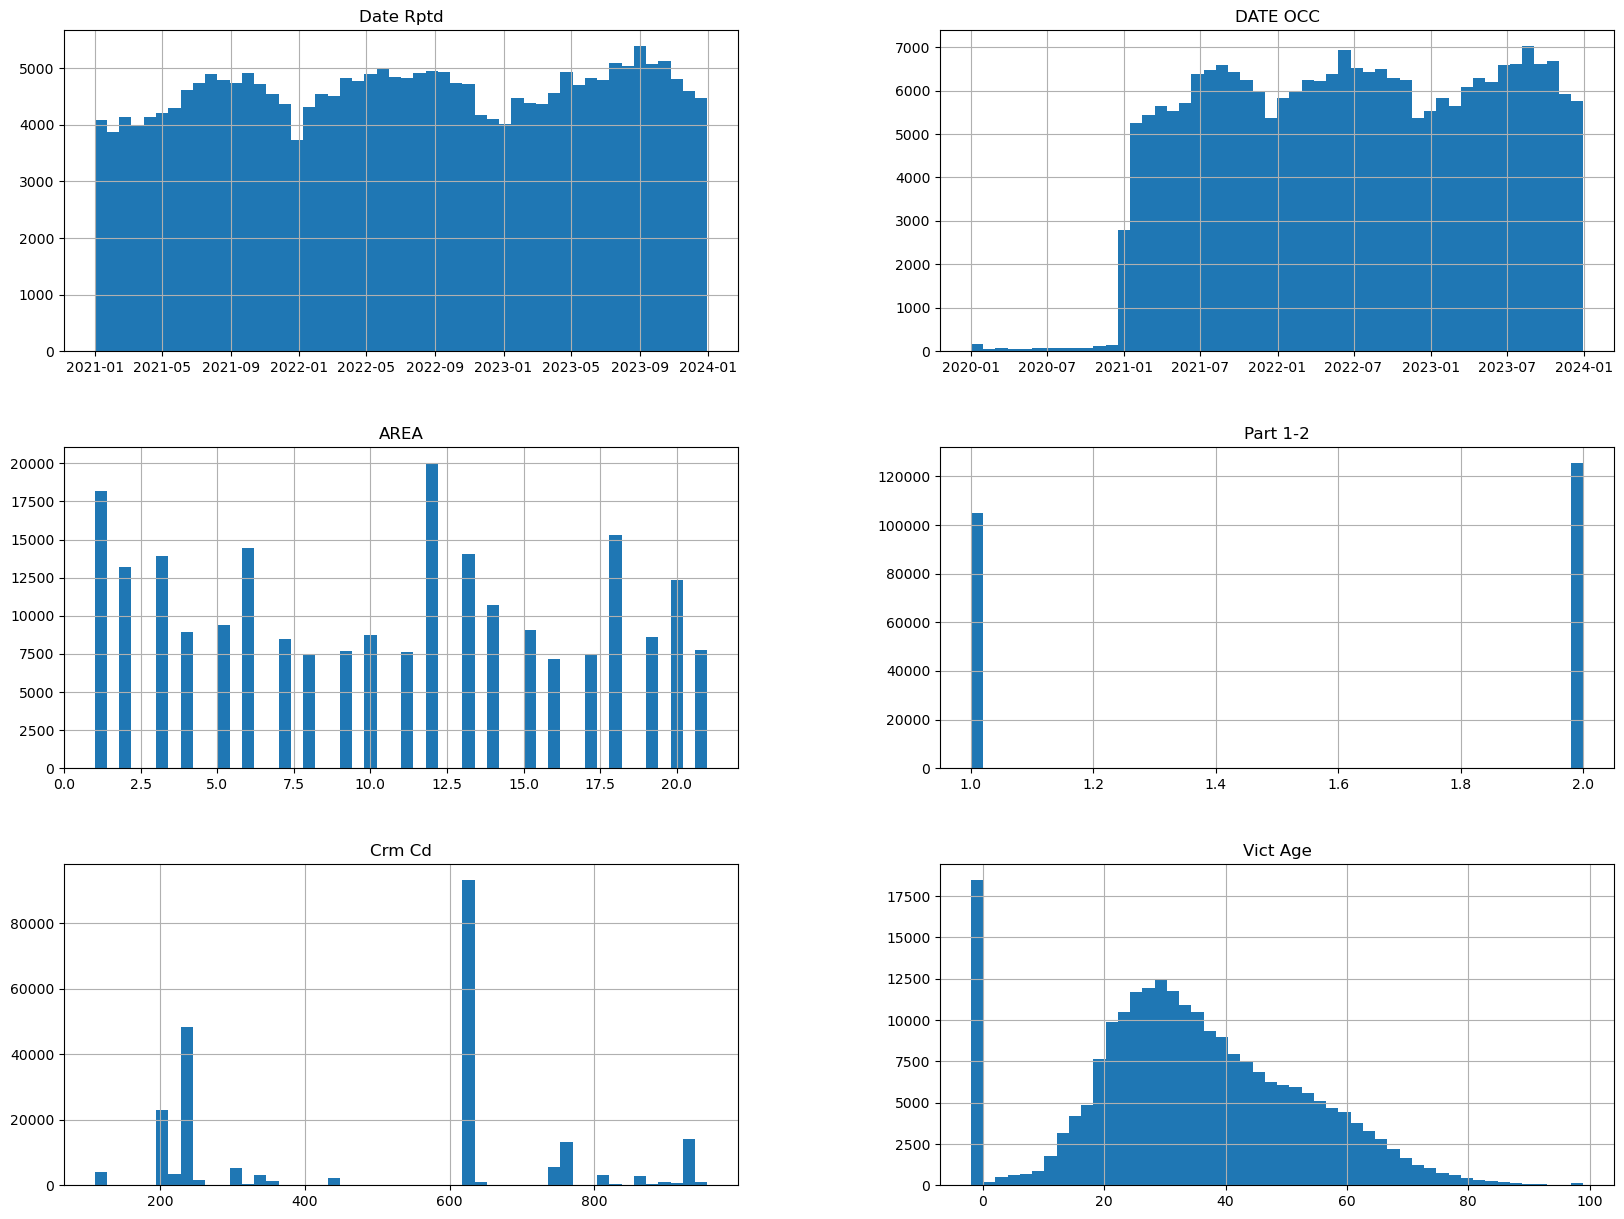

In [97]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
data['DATE OCC'].value_counts().sort_index()

DATE OCC
2020-01-01    122
2020-01-03      7
2020-01-04      2
2020-01-06      3
2020-01-07      1
             ... 
2023-12-27    159
2023-12-28    131
2023-12-29    162
2023-12-30    183
2023-12-31    140
Name: count, Length: 1383, dtype: int64

The area with the most crimes is 12 with 20045 crimes.


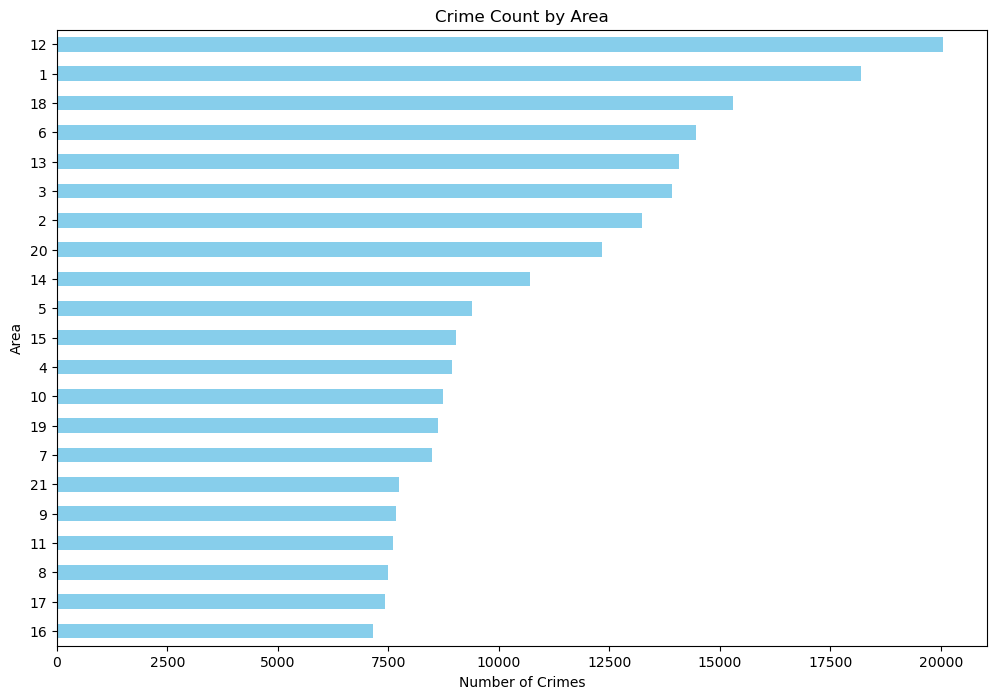

In [25]:
#graph of area's crime rate
crime_data = data.groupby('AREA').size()

# Find the area with the maximum number of crimes
most_crime_area = crime_data.idxmax()
most_crime_count = crime_data.max()

print(f"The area with the most crimes is {most_crime_area} with {most_crime_count} crimes.")

# Optional: Visualize the crime counts by area
plt.figure(figsize=(12, 8))
crime_data.sort_values().plot(kind='barh', color='skyblue')
plt.title('Crime Count by Area')
plt.xlabel('Number of Crimes')
plt.ylabel('Area')
plt.show()
